In [2]:
import os
import pm4py
from pm4py.algo.discovery.alpha import algorithm as alpha_miner
from pm4py.algo.analysis.woflan import algorithm as woflan


path = "/workspaces/Exe/data/Sepsis.xes"

In [3]:
if not os.path.exists(path):
    raise FileNotFoundError(f"File not found: {path}")

# Read the XES log
log = pm4py.read_xes(path)

# Basic counts
n_events = len(log)


print(f"Number of events: {n_events}")

/workspaces/Exe/.venv/lib/python3.10/site-packages/pm4py/utils.py:991: UserWarning: Install the optional requirement `rustxes` to import/export files faster.
  warnings.warn("Install the optional requirement `rustxes` to import/export files faster.")
/workspaces/Exe/.venv/lib/python3.10/site-packages/pm4py/util/dt_parsing/parser.py:82: UserWarning: ISO8601 strings are not fully supported with strpfromiso for Python versions below 3.11
  warnings.warn(
/workspaces/Exe/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
parsing log, completed traces :: 100%|██████████| 1050/1050 [00:00<00:00, 1872.19it/s]


Number of events: 15214


In [4]:
net, im, fm = alpha_miner.apply(log)

In [5]:
is_sound, diagn = woflan.apply(net, im, fm, parameters={"print_diagnostics": True, "return_diagnostics": True})
print("is_sound", is_sound)
print(diagn)

Input is ok.
Petri Net is a not a worflow net.
is_sound False
{'s_c_net': places: [ ({'ER Sepsis Triage'}, {'IV Antibiotics'}), ({'IV Antibiotics'}, {'Release A', 'Release B', 'ER Registration'}), ({'IV Liquid'}, {'Release A', 'Release B'}), ({'Release A', 'Release D', 'Release C', 'Release E'}, {'Return ER'}), end, start ]
transitions: [ (Admission IC, 'Admission IC'), (Admission NC, 'Admission NC'), (CRP, 'CRP'), (ER Registration, 'ER Registration'), (ER Sepsis Triage, 'ER Sepsis Triage'), (ER Triage, 'ER Triage'), (IV Antibiotics, 'IV Antibiotics'), (IV Liquid, 'IV Liquid'), (LacticAcid, 'LacticAcid'), (Leucocytes, 'Leucocytes'), (Release A, 'Release A'), (Release B, 'Release B'), (Release C, 'Release C'), (Release D, 'Release D'), (Release E, 'Release E'), (Return ER, 'Return ER'), (short_circuited_transition, 'short_circuited_transition') ]
arcs: [ (Admission NC, 'Admission NC')->end, (CRP, 'CRP')->end, (ER Sepsis Triage, 'ER Sepsis Triage')->({'ER Sepsis Triage'}, {'IV Antibiotic

In [11]:
diagn["s_c_net"].arcs

{(Admission NC, 'Admission NC')->end,
 (CRP, 'CRP')->end,
 (ER Sepsis Triage, 'ER Sepsis Triage')->({'ER Sepsis Triage'}, {'IV Antibiotics'}),
 (ER Sepsis Triage, 'ER Sepsis Triage')->end,
 (ER Triage, 'ER Triage')->end,
 (IV Antibiotics, 'IV Antibiotics')->({'IV Antibiotics'}, {'Release A', 'Release B', 'ER Registration'}),
 (IV Antibiotics, 'IV Antibiotics')->end,
 (IV Liquid, 'IV Liquid')->({'IV Liquid'}, {'Release A', 'Release B'}),
 (IV Liquid, 'IV Liquid')->end,
 (LacticAcid, 'LacticAcid')->end,
 (Leucocytes, 'Leucocytes')->end,
 (Release A, 'Release A')->({'Release A', 'Release D', 'Release C', 'Release E'}, {'Return ER'}),
 (Release A, 'Release A')->end,
 (Release B, 'Release B')->end,
 (Release C, 'Release C')->({'Release A', 'Release D', 'Release C', 'Release E'}, {'Return ER'}),
 (Release C, 'Release C')->end,
 (Release D, 'Release D')->({'Release A', 'Release D', 'Release C', 'Release E'}, {'Return ER'}),
 (Release D, 'Release D')->end,
 (Release E, 'Release E')->({'Release

In [18]:
footprints = pm4py.discover_footprints(log)
print("Footprints:")
for key, value in footprints.items():
    print(f"{key}: {value}")

Footprints:
dfg: {('Admission IC', 'Admission IC'): 1, ('Admission IC', 'Admission NC'): 4, ('Admission IC', 'CRP'): 32, ('Admission IC', 'ER Sepsis Triage'): 1, ('Admission IC', 'LacticAcid'): 41, ('Admission IC', 'Leucocytes'): 38, ('Admission NC', 'Admission IC'): 20, ('Admission NC', 'Admission NC'): 175, ('Admission NC', 'CRP'): 369, ('Admission NC', 'ER Sepsis Triage'): 5, ('Admission NC', 'ER Triage'): 1, ('Admission NC', 'IV Antibiotics'): 2, ('Admission NC', 'IV Liquid'): 22, ('Admission NC', 'LacticAcid'): 27, ('Admission NC', 'Leucocytes'): 408, ('Admission NC', 'Release A'): 117, ('Admission NC', 'Release B'): 17, ('Admission NC', 'Release C'): 4, ('Admission NC', 'Release D'): 1, ('CRP', 'Admission IC'): 17, ('CRP', 'Admission NC'): 187, ('CRP', 'CRP'): 317, ('CRP', 'ER Registration'): 14, ('CRP', 'ER Sepsis Triage'): 35, ('CRP', 'ER Triage'): 16, ('CRP', 'IV Antibiotics'): 81, ('CRP', 'IV Liquid'): 111, ('CRP', 'LacticAcid'): 629, ('CRP', 'Leucocytes'): 1445, ('CRP', 'Rel

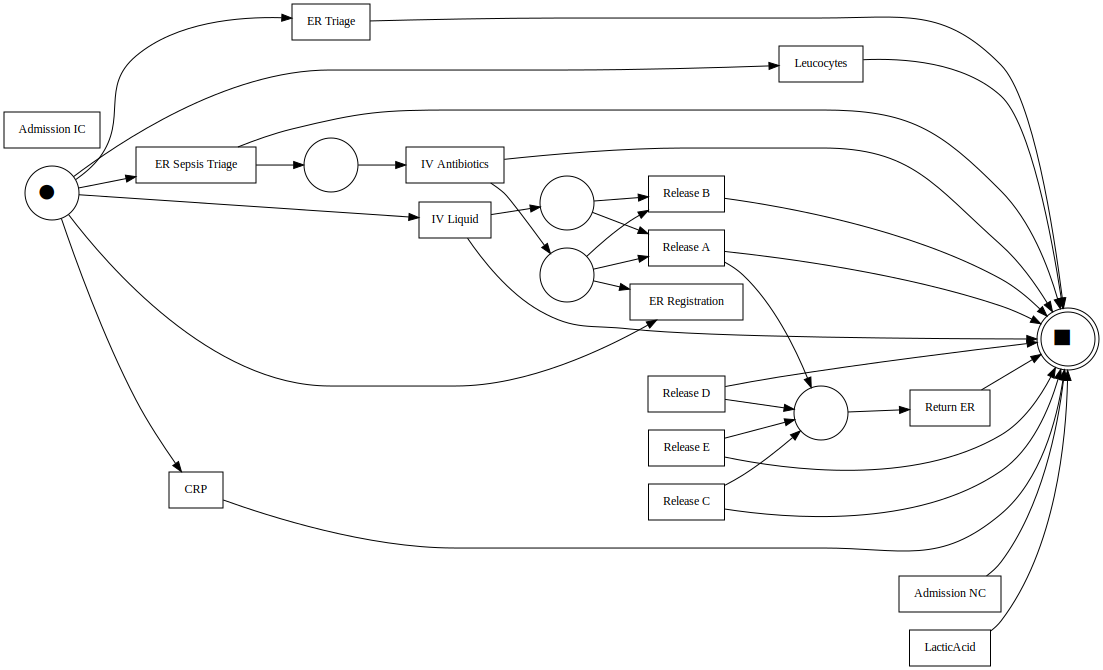

In [20]:
pm4py.visualization.petri_net.visualizer.apply(net, im, fm)